# Инициализация

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Hacatons/Газпром/Data scientist в управлении проектной командой.zip'

Archive:  /content/drive/MyDrive/Hacatons/Газпром/Data scientist в управлении проектной командой.zip
  inflating: cases.csv               
  inflating: diaries.csv             
  inflating: marks.csv               
  inflating: history.pdf             
  inflating: history.docx            


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
db_cases = pd.read_csv('/content/cases.csv', sep = ';')
db_diaries = pd.read_csv('/content/diaries.csv', sep = ';')
db_marks = pd.read_csv('/content/marks.csv', sep = ';')

In [6]:
db_cases['Номер поручения'] = db_cases['\ufeffНомер поручения']
db_cases.drop(columns = ['\ufeffНомер поручения'], inplace = True)
db_cases['Дата выполнения'] = db_cases['Дата выполнения'].fillna('0000-00-00')
db_cases['Затрачено дней'] = db_cases['Затрачено дней'].fillna('0')
db_cases['Затрачено дней'] = db_cases['Затрачено дней'].astype(float)
db_cases['Выполнено'] = db_cases['Выполнено'].apply(lambda x: 1 if x == 'да' else 0)

db_cases.head()

,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,Описание,Номер поручения
0,Анна,1051-08-11,1,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,11000
1,Мария,1051-07-09,1,1051-09-02,2.0,20000,В лесу по дороге от пещеры были замечены разбо...,11001
2,Эмилио,1053-10-05,1,1053-10-20,7.0,22500,По дороге из деревни монстры похитили путников...,11002
3,Бьянка,1052-11-24,1,1052-12-02,5.0,5500,Недалеко от города видели монстров. Нужно побе...,11003
4,Бьянка,1052-02-23,1,1052-03-30,8.0,10500,В деревне у меня пропала сумка с документами. ...,11004


In [7]:
db_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Заказчик              500 non-null    object 
 1   Дата поручения        500 non-null    object 
 2   Выполнено             500 non-null    int64  
 3   Дата выполнения       500 non-null    object 
 4   Затрачено дней        500 non-null    float64
 5   Сумма вознаграждения  500 non-null    int64  
 6   Описание              500 non-null    object 
 7   Номер поручения       500 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


In [8]:
db_diaries['Затрачено часов'] = db_diaries['Затрачено часов']\
.apply(lambda x: float(x) if ',' not in x else float(x.split(sep = ',')[0] + '.' + x.split(sep = ',')[1]))

db_diaries.head()

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.0,рейнджер
1,11000,Мартин,выследить цель,6.0,следопыт
2,11001,Альфред,разжечь костёр,1.0,рейнджер
3,11001,Альфред,залечить раны,18.0,лекарь
4,11002,Мартин,выследить цель,6.0,следопыт


In [9]:
db_marks['Герой'].value_counts()

,count
Герой,
Юлия,55
Пастушок,49
Леопольд,47
Глюкоза,44
Бендер,42
Бенедикт,42
Фредерик,41
Синеглазый,41
Альфред,39


In [10]:
db_cases['Описание'].value_counts()[:10]

,count
Описание,
В пещере появвилось огромное каменное чудовище. Нужно убить его.,23
В пещере появвилось огромное каменное чудовище. Нужно уничтожить его.,22
В пещере завёлся дракон. Нужно его уничтожить.,19
В пещере завёлся дракон. Нужно его убить.,18
"В пещере завёлся дракон. Нужно его уничтожить. Это может потребовать времени и усилий, так как дракон очень опасен.",15
"Недалеко от города монстры похитили путников. Нужно спасти их. Осмотрите все возможные укрытия, чтобы найти похищенных.",9
По дороге из деревни монстры похитили путников. Нужно освободить их.,8
"В пещере завёлся дракон. Нужно его убить. Это может потребовать времени и усилий, так как дракон очень опасен.",8
"В городе монстры похитили путников. Нужно освободить их. Осмотрите все возможные укрытия, чтобы найти похищенных.",6


In [11]:
db_cases[db_cases['Выполнено'] == 0][['Номер поручения', 'Описание']]

,Номер поручения,Описание
56,11056,По дороге из деревни у меня пропала драгоценно...
134,11134,В пещере появвилось огромное каменное чудовище...
143,11143,В пещере завёлся дракон. Нужно его убить. Это ...
161,11161,В городе у меня потерялся рюкзак. Нужно найти ...
218,11218,Недалеко от города монстры похитили путников. ...
232,11232,В деревне монстры похитили путников. Нужно спа...
234,11234,В лесу по дороге от пещеры заметили разбойнико...
285,11285,В городе у меня потерялся рюкзак. Нужно найти ...
306,11306,В деревне монстры похитили путников. Нужно спа...
310,11310,По дороге из деревни монстры похитили путников...


In [12]:
for wrong in db_cases[db_cases['Выполнено'] == 0]['Описание'].values:
     if wrong not in db_cases[db_cases['Выполнено'] == 1]['Описание'].values:
        print(wrong)

В лесу по дороге от пещеры заметили разбойников. Нужно прогнать их.
По дороге из деревни у меня потерялась драгоценность. Нужно вернуть её как можно скорее.
В лесу около деревни звери нападают на людей. Нужно прогнать их.


# Создание карточек героев

In [13]:
db_diaries.head()

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.0,рейнджер
1,11000,Мартин,выследить цель,6.0,следопыт
2,11001,Альфред,разжечь костёр,1.0,рейнджер
3,11001,Альфред,залечить раны,18.0,лекарь
4,11002,Мартин,выследить цель,6.0,следопыт


In [15]:
db_cases.columns

Index(['Заказчик', 'Дата поручения', 'Выполнено', 'Дата выполнения',
       'Затрачено дней', 'Сумма вознаграждения', 'Описание',
       'Номер поручения'],
      dtype='object')

In [16]:
db_diaries.columns

Index(['Номер поручения', 'Герой', 'Запись в дневнике', 'Затрачено часов',
       'Роль'],
      dtype='object')

In [14]:
db_diaries['Роль'].unique()

array(['рейнджер', 'следопыт', 'лекарь', 'лучник', 'мечник', 'боевой маг'],
      dtype=object)

In [17]:
# создание таблицы с героями и их задачами
db_heroes = db_cases.merge(db_marks, how = 'left', on = 'Номер поручения')\
.merge(db_diaries[['Номер поручения', 'Затрачено часов', 'Роль', 'Запись в дневнике']], how = 'left', on = 'Номер поручения')\
[[
    'Герой', 'Выполнено', 'Описание',\
    'Затрачено дней', 'Оценка за качество', 'Оценка по срокам',\
    'Оценка за вежливость', 'Затрачено часов', 'Сумма вознаграждения', 'Роль', 'Запись в дневнике', 'Дата поручения', 'Дата выполнения', 'Номер поручения'
  ]]

for role in db_diaries['Роль'].unique():
    db_heroes[role] = db_heroes[['Роль', 'Затрачено часов']].apply(lambda x: round(float(x.iloc[1]), 3) if x.iloc[0] == role else 0, axis = 1)

for skill in db_diaries['Запись в дневнике'].unique():
    db_heroes[skill] = db_heroes[['Запись в дневнике', 'Затрачено часов']].apply(lambda x: round(float(x.iloc[1]), 3) if x.iloc[0] == skill else 0, axis = 1)

db_heroes.drop(columns = ['Роль', 'Затрачено часов', 'Запись в дневнике'], inplace = True)

db_group_heroes = db_heroes[['Номер поручения'] + list(db_heroes.columns[-11:])].groupby(['Номер поручения'], dropna = False).sum()

db_heroes = db_heroes[db_heroes.columns[:-11]].drop_duplicates().reset_index(drop = True)

db_heroes = db_heroes.merge(db_group_heroes, how = 'inner', on = 'Номер поручения')
db_heroes

,Герой,Выполнено,Описание,Затрачено дней,Оценка за качество,Оценка по срокам,Оценка за вежливость,Сумма вознаграждения,Дата поручения,Дата выполнения,...,следопыт,лекарь,лучник,мечник,боевой маг,разжечь костёр,выследить цель,залечить раны,найти пропажу,отыскать заказчика
0,Мартин,1,В лесу по дороге от пещеры звери нападают на л...,4.0,4,3,4,6000,1051-08-11,1051-08-21,...,6.0,0.0,1.0,0.000,0.000,2.000,6.0,0.0,0.0,0.0
1,Альфред,1,В лесу по дороге от пещеры были замечены разбо...,2.0,5,5,4,20000,1051-07-09,1051-09-02,...,0.0,18.0,0.0,2.000,0.000,3.000,0.0,18.0,0.0,0.0
2,Мартин,1,По дороге из деревни монстры похитили путников...,7.0,5,4,4,22500,1053-10-05,1053-10-20,...,6.0,0.0,0.0,0.000,0.000,0.000,6.0,0.0,0.0,0.0
3,Бендер,1,Недалеко от города видели монстров. Нужно побе...,5.0,2,4,3,5500,1052-11-24,1052-12-02,...,0.0,0.0,0.0,0.667,0.000,0.667,0.0,0.0,0.0,0.0
4,Юлия,1,В деревне у меня пропала сумка с документами. ...,8.0,4,4,5,10500,1052-02-23,1052-03-30,...,7.5,0.0,0.0,0.000,0.000,0.000,0.0,0.0,4.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Синеглазый,1,В лесу около деревни встречаются звери. Нужно ...,4.0,3,4,4,23000,1053-04-06,1053-05-11,...,0.0,18.0,0.0,1.000,0.000,1.667,0.0,18.0,0.0,0.0
496,Юлия,1,В лесу между городом и деревней видели монстро...,7.0,3,3,4,9000,1052-10-03,1052-11-25,...,0.0,18.0,0.0,1.000,0.000,1.667,0.0,18.0,0.0,0.0
497,Пастушок,1,В лесу по дороге от пещеры монстры нападают на...,4.0,5,3,5,8000,1053-06-13,1053-07-10,...,0.0,0.0,0.0,0.667,0.000,1.667,0.0,0.0,0.0,0.0
498,Мартин,1,В лесу около деревни разбойники нападают на лю...,2.0,4,4,4,28000,1052-10-18,1052-12-16,...,0.0,0.0,1.0,0.000,0.000,2.000,0.0,0.0,0.0,0.0


# Создание карточек квестов

Статистики про квест:


1.   Суммарное кол-во попыток - total_describes
2.   Серднее время выполнения задания - Среднее кол-во затраченных дней
3.   Медианная оплата - медианная сумма вознагражения
4.   Кол-во неудачных попыток - num_wrong_cases
5.   Какое нужны роли
6.   Какие нужны умения  



In [27]:
db_diaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Номер поручения    888 non-null    int64  
 1   Герой              888 non-null    object 
 2   Запись в дневнике  888 non-null    object 
 3   Затрачено часов    888 non-null    float64
 4   Роль               888 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.8+ KB


In [28]:
# создание карточки квеста

db_items = pd.DataFrame(db_cases['Описание'].unique(), columns = ['Описание'])

# кол-во уникальных задач
db_items = db_items.merge(db_cases['Описание'].value_counts().reset_index(), 'inner', 'Описание')
db_items['total_describes'] =  db_items['count']
db_items.drop(columns = ['count'], inplace = True)

#
db_items = db_items.merge(db_cases[['Описание', 'Затрачено дней']].groupby(['Описание'])\
                          .mean().reset_index(), 'inner', 'Описание')

db_items = db_items.merge(db_cases[['Описание', 'Сумма вознаграждения']].groupby(['Описание'])\
                          .median().reset_index(), 'inner', 'Описание')

db_items = db_items.merge(db_cases[db_cases['Выполнено'] == 0]['Описание'].value_counts().reset_index(), 'left', 'Описание')

db_items['num_wrong_cases'] =  db_items['count'].fillna(0)
db_items.drop(columns = ['count'], inplace = True)

db_items = db_items.rename(columns = {'Сумма вознаграждения': 'Медианная сумма вознаграждения', 'Затрачено дней': 'Среднее кол-во затраченных дней'})


db1 = db_cases.merge(db_diaries, 'inner', 'Номер поручения')
for role in db_diaries['Роль'].unique():
    db1[role] = db1[['Роль', 'Затрачено часов']].apply(lambda x: round(float(x.iloc[1]), 3) if x.iloc[0] == role else 0, axis = 1)

for skill in db_diaries['Запись в дневнике'].unique():
    db1[skill] = db1[['Запись в дневнике', 'Затрачено часов']].apply(lambda x: round(float(x.iloc[1]), 3) if x.iloc[0] == skill else 0, axis = 1)

db1.drop(columns = ['Роль', 'Затрачено часов', 'Запись в дневнике'], inplace = True)
# db1

columns = dict(list({key: 'sum' for key in db1.columns[-11:-5]}.items()) + list({key: 'mean' for key in db1.columns[-5:]}.items()))
def my_agg(x):
    if x.name in list(columns.keys())[-5:]:
        total = 0
        for elem in x.values:
            if elem > 0:
                total += 1
        if total > 0:
            return sum(x) / total
        else:
            return 0
    else:
        return sum(x)

db2 = db1[['Описание'] + list(db1.columns[-11:])].groupby(['Описание'], dropna = False).agg(my_agg).reset_index()
db1 = db1[db1.columns[:-11]][['Описание', 'Номер поручения']].drop_duplicates().reset_index(drop = True)

db_items = db_items.merge(db2, 'left', 'Описание')
db_items.fillna(-1, inplace = True)

In [29]:
db_items

,Описание,total_describes,Среднее кол-во затраченных дней,Медианная сумма вознаграждения,num_wrong_cases,рейнджер,следопыт,лекарь,лучник,мечник,боевой маг,разжечь костёр,выследить цель,залечить раны,найти пропажу,отыскать заказчика
0,В лесу по дороге от пещеры звери нападают на л...,2,2.5,7750.0,0.0,1.667,12.0,0.0,1.0,1.000,0.000,0.91675,6.0,0.0,0.0,0.0
1,В лесу по дороге от пещеры были замечены разбо...,1,2.0,20000.0,0.0,1.000,0.0,18.0,0.0,2.000,0.000,1.50000,0.0,18.0,0.0,0.0
2,По дороге из деревни монстры похитили путников...,5,6.6,19500.0,0.0,0.000,42.0,0.0,0.0,0.000,0.000,0.00000,8.4,0.0,0.0,0.0
3,Недалеко от города видели монстров. Нужно побе...,1,5.0,5500.0,0.0,0.000,0.0,0.0,0.0,0.667,0.000,0.66700,0.0,0.0,0.0,0.0
4,В деревне у меня пропала сумка с документами. ...,1,8.0,10500.0,0.0,0.000,7.5,0.0,0.0,0.000,0.000,0.00000,0.0,0.0,4.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,В лесу по дороге от пещеры разбойники нападают...,1,1.0,29000.0,0.0,0.667,0.0,0.0,0.0,2.000,0.000,1.33350,0.0,0.0,0.0,0.0
239,По дороге из деревни заметили разбойников. Нуж...,1,3.0,17500.0,0.0,0.000,0.0,0.0,0.0,0.000,0.667,0.66700,0.0,0.0,0.0,0.0
240,В лесу по дороге от пещеры встречаются звери. ...,1,4.0,20500.0,0.0,1.000,4.0,0.0,0.0,2.000,0.000,1.50000,4.0,0.0,0.0,0.0
241,В лесу около деревни заметили разбойников. Нуж...,1,4.0,8500.0,0.0,0.667,0.0,0.0,0.0,2.000,0.000,1.33350,0.0,0.0,0.0,0.0


В дневнике нет записей с неудачных походов

In [30]:
for elem in db_cases[db_cases['Выполнено'] == 0]['Номер поручения'].unique():
    if elem in db_diaries['Номер поручения'].unique():
        print(elem)

In [31]:
db_diaries[db_diaries['Номер поручения'] == any(db_cases[db_cases['Выполнено'] == 0]['Номер поручения'].unique())]

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль


# Анализ неудачных попыток и их причины

Прежде чем начинать решать задачу разберемся, с чем связаны неудачи героев при выполнении задачи

In [220]:
db_heroes[db_heroes['Выполнено'] == 0]['Герой'].value_counts()

,count
Герой,
Пастушок,4
Синеглазый,3
Юлия,3
Агата,3
Бенедикт,2
Леопольд,2
Альфред,1
Соня,1


**Рассмотрим пример Пастушка**

In [221]:
columns = dict(list({key: 'sum' for key in db_heroes.columns[-11:-5]}.items()) + list({key: 'mean' for key in db_heroes.columns[-5:]}.items()))
def my_agg(x):
    if x.name in list(columns.keys())[-5:]:
        total = 0
        for elem in x.values:
            if elem > 0:
                total += 1
        if total > 0:
            return sum(x) / total
        else:
            return 0
    else:
        return sum(x)
db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes.columns[-11:]].agg(my_agg)

,0
рейнджер,8.000000
следопыт,333.000000
лекарь,0.000000
лучник,0.000000
мечник,14.674000
боевой маг,0.000000
разжечь костёр,1.030636
выследить цель,12.000000
залечить раны,0.000000
найти пропажу,9.000000


**Как видно, у героя нет опыта в ролях: лекарь, лучник, боевой маг**

In [222]:
sent = db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes['Выполнено'] == 0]['Описание'].iloc[1]
sent

'В лесу по дороге от пещеры заметили разбойников. Нужно прогнать их.'

In [223]:
i = 0
db_items[db_items['Описание'] == db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes['Выполнено'] == 0]['Описание'].iloc[i]][['Описание'] + list(db_items.columns[-11:])]

,Описание,рейнджер,следопыт,лекарь,лучник,мечник,боевой маг,разжечь костёр,выследить цель,залечить раны,найти пропажу,отыскать заказчика
6,В пещере появвилось огромное каменное чудовище...,0.0,0.0,144.0,2.334,22.334,2.667,1.301667,0.0,11.076923,0.0,0.0


**Как видно, чтобы успешно выполнить задание нужно быть лекарем, лучником, мечником и боевым магом, а у Пастушка таких способностей нет, поэтому он и не справился**

In [224]:
i = 1

db_items[db_items['Описание'] == db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes['Выполнено'] == 0]['Описание'].iloc[i]][['Описание'] + list(db_items.columns[-6:])]

,Описание,боевой маг,разжечь костёр,выследить цель,залечить раны,найти пропажу,отыскать заказчика
139,В лесу по дороге от пещеры заметили разбойнико...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


**Данный пример показывает, что не у всех заданий есть история, поэтому требуется применять другие методы для анализа таких кейсов, например, можно посмотреть насколько данное задание похоже на другие и взять с них статистику**

In [225]:
i = 2

db_items[db_items['Описание'] == db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes['Выполнено'] == 0]['Описание'].iloc[i]][['Описание'] + list(db_items.columns[-11:])]

,Описание,рейнджер,следопыт,лекарь,лучник,мечник,боевой маг,разжечь костёр,выследить цель,залечить раны,найти пропажу,отыскать заказчика
105,Недалеко от города у меня пропала драгоценност...,0.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,3.0


In [226]:
sent = db_items[db_items['Описание'] == db_heroes[db_heroes['Герой'] == 'Пастушок'][db_heroes['Выполнено'] == 0]['Описание'].iloc[i]][['Описание'] + list(db_items.columns[-11:])]['Описание'].values[0]
sent

'Недалеко от города у меня пропала драгоценность. Нужно вернуть её как можно скорее.'

**В этом случае для выполнения задания требовались навыки в следопытстве, которые развиты у нашего героя, поэтому данный случай требует тщательного анализа**

**Интересно, что несмотря на не выполненные задания оценки все равно в основном проставлены хорошие, возможно ориентироваться на оценки вообще не стоит при подготовке модели, проверим эту гипотезу**

array([[<Axes: title={'center': 'Оценка за качество'}>,
        <Axes: title={'center': 'Оценка по срокам'}>],
       [<Axes: title={'center': 'Оценка за вежливость'}>, <Axes: >]],
      dtype=object)

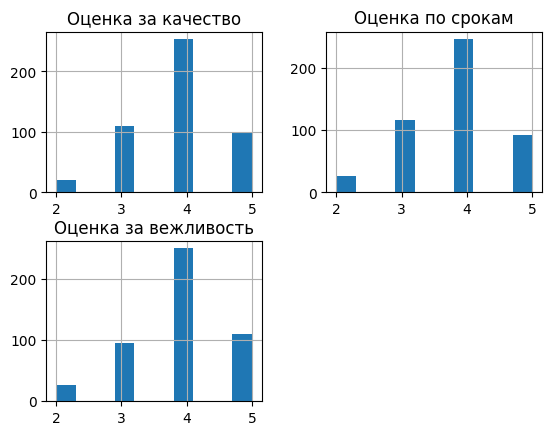

In [228]:
db_heroes[db_heroes['Выполнено'] == 1][['Оценка за качество', 'Оценка по срокам', 'Оценка за вежливость']].hist()

array([[<Axes: title={'center': 'Оценка за качество'}>,
        <Axes: title={'center': 'Оценка по срокам'}>],
       [<Axes: title={'center': 'Оценка за вежливость'}>, <Axes: >]],
      dtype=object)

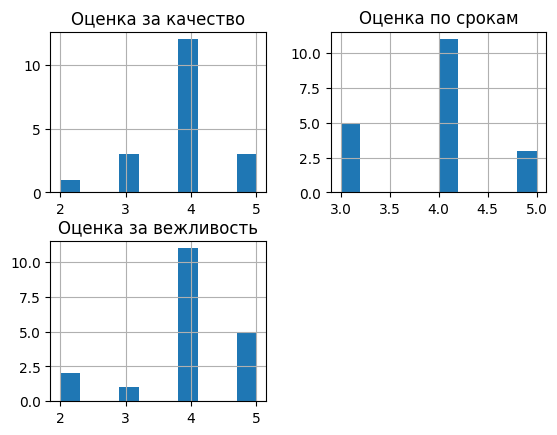

In [229]:
db_heroes[db_heroes['Выполнено'] == 0][['Оценка за качество', 'Оценка по срокам', 'Оценка за вежливость']].hist()

**Из гистограмм видно, что "Оценка за качество" и "Оценка за вежливость" распределены одинаково, а "Оценка по срокам" в случае невыполнения даже слегка лучше**

**Гипотеза: если за поручение большое вознаграждение, то герои напиваются в баре вместо того, чтобы выполнять задание**

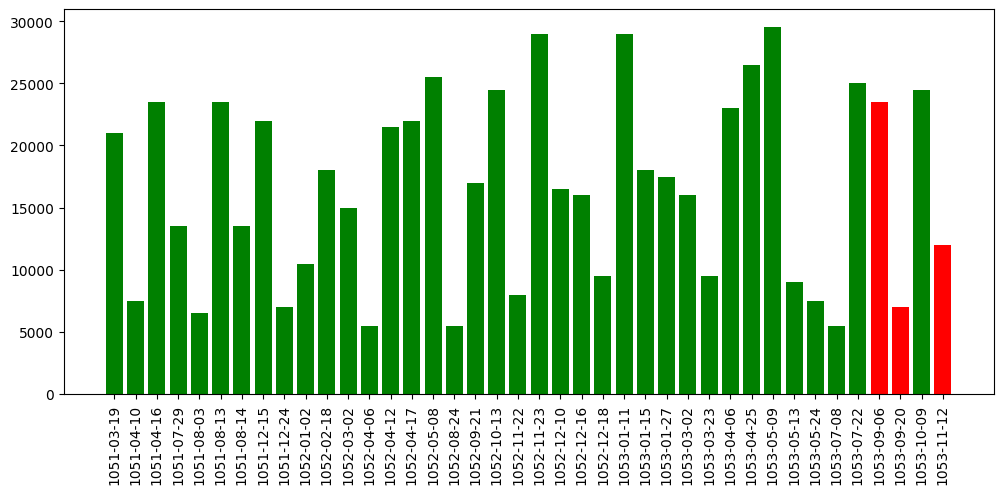

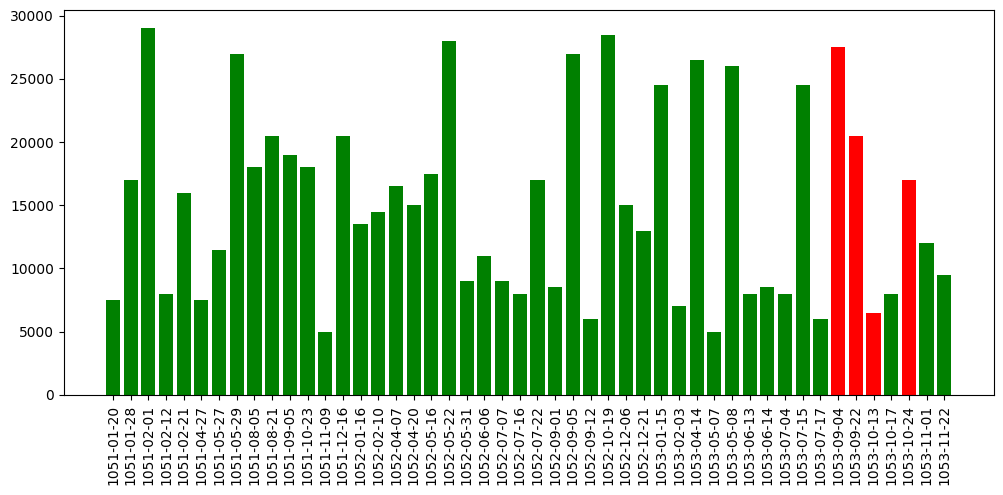

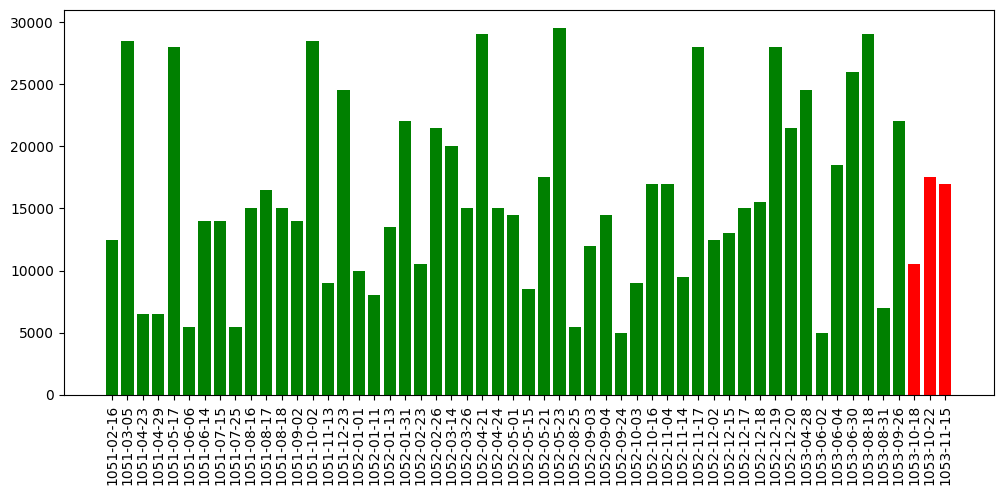

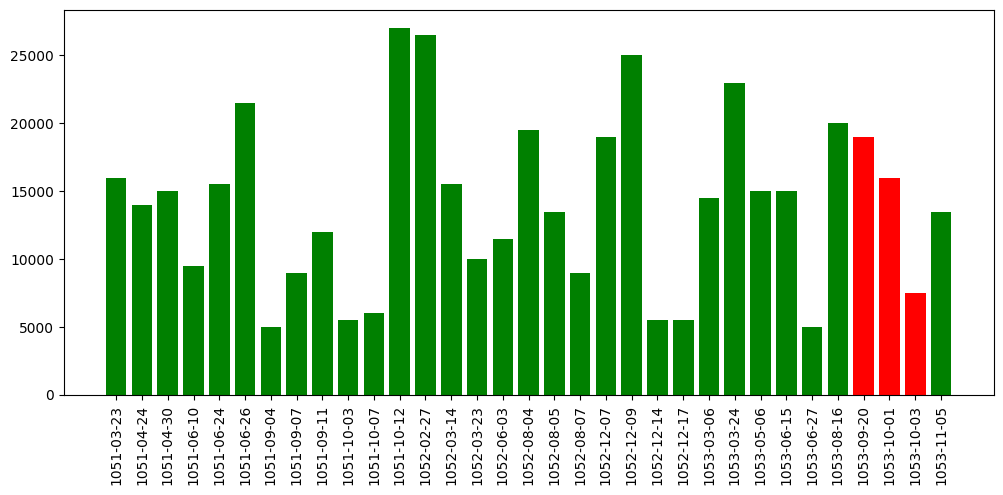

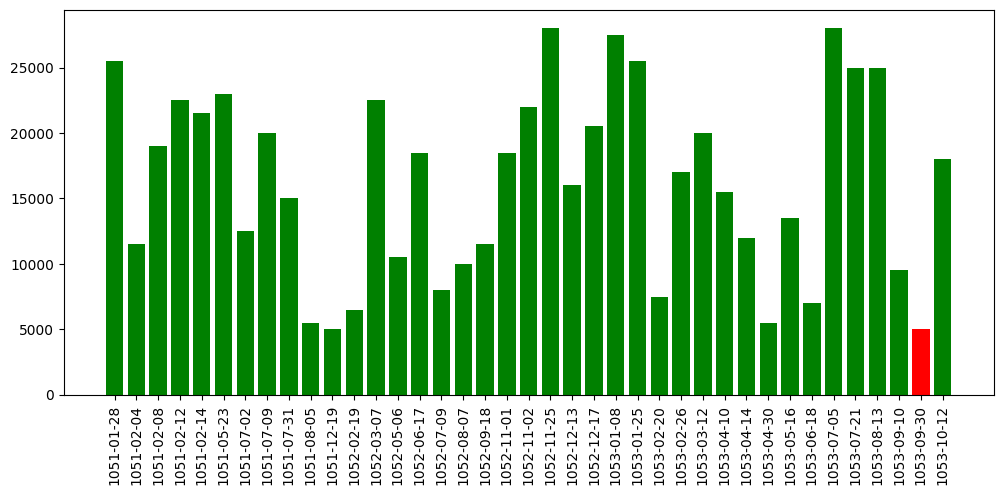

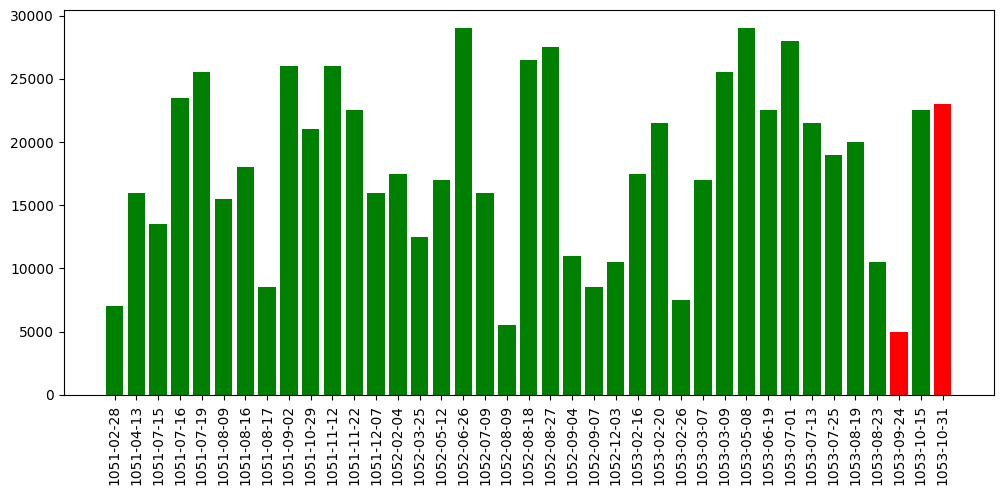

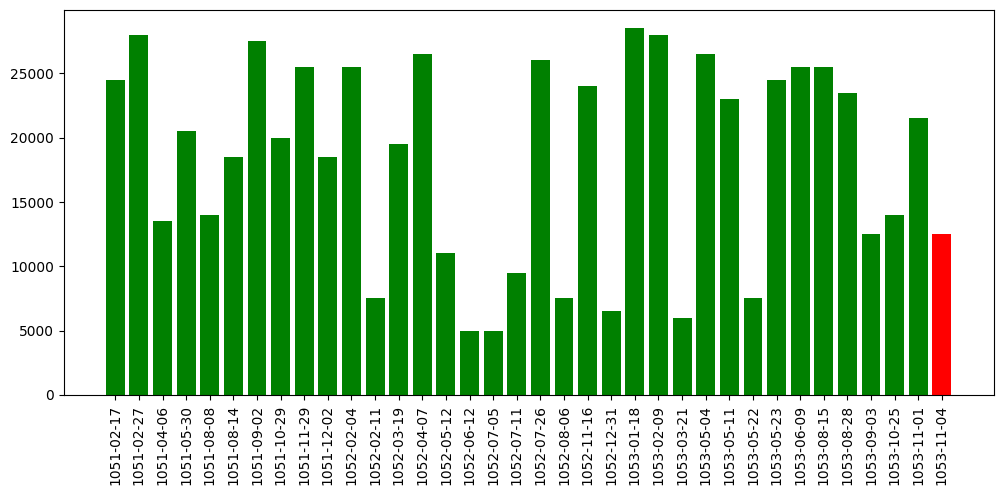

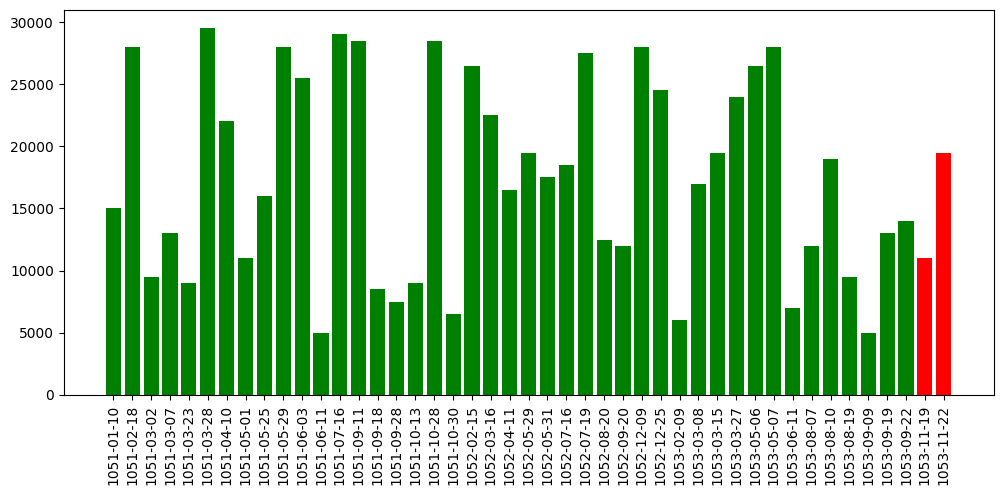

In [230]:
heros = db_heroes[db_heroes['Выполнено'] == 0]['Герой'].unique()
for hero in heros:
    wrong_hero = db_heroes[db_heroes['Герой'] == hero]
    wrong_hero_cases = wrong_hero[['Дата поручения', 'Сумма вознаграждения', 'Выполнено']].values
    wrong_hero_cases = np.array(sorted(wrong_hero_cases, key = lambda x: x[0]))

    color = ['red' if elem[2] == 0 else 'green' for elem in wrong_hero_cases]

    plt.figure(figsize = (12, 5))
    plt.bar(wrong_hero_cases[:, 0], wrong_hero_cases[:, 1], color = color)
    plt.xticks(rotation = 90)
    plt.show()

**Как видно из графиков, проблемы начались после 1053-09-01, что не связано с суммой заказа и оценками за работу**

**Рассмотрим ту же статистику по героям без неудач**

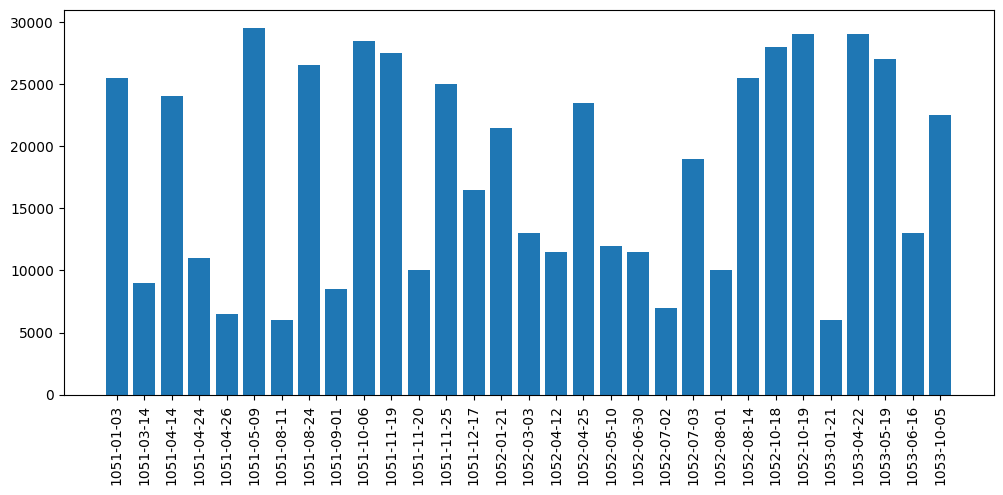

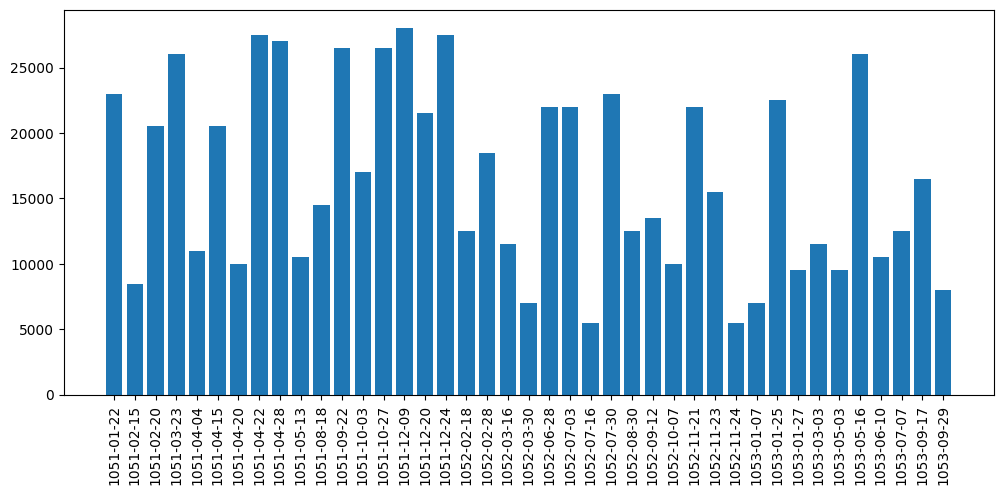

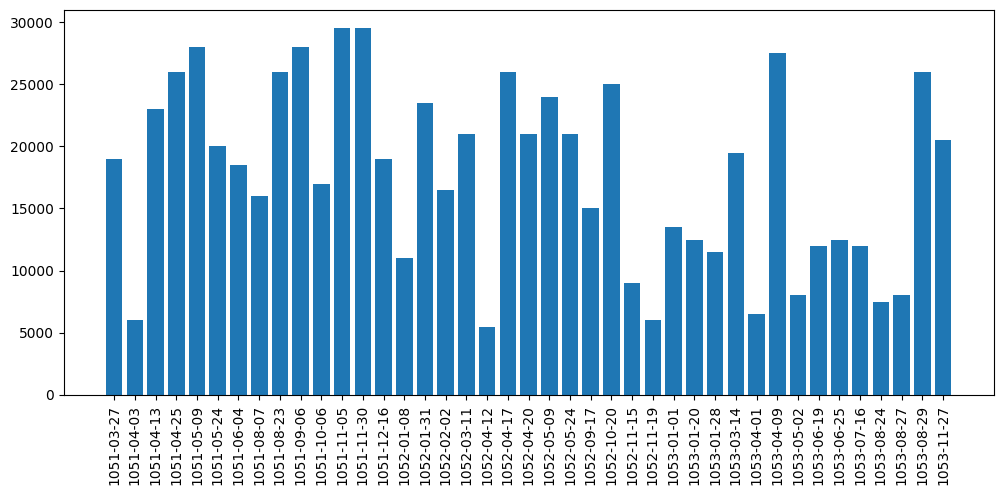

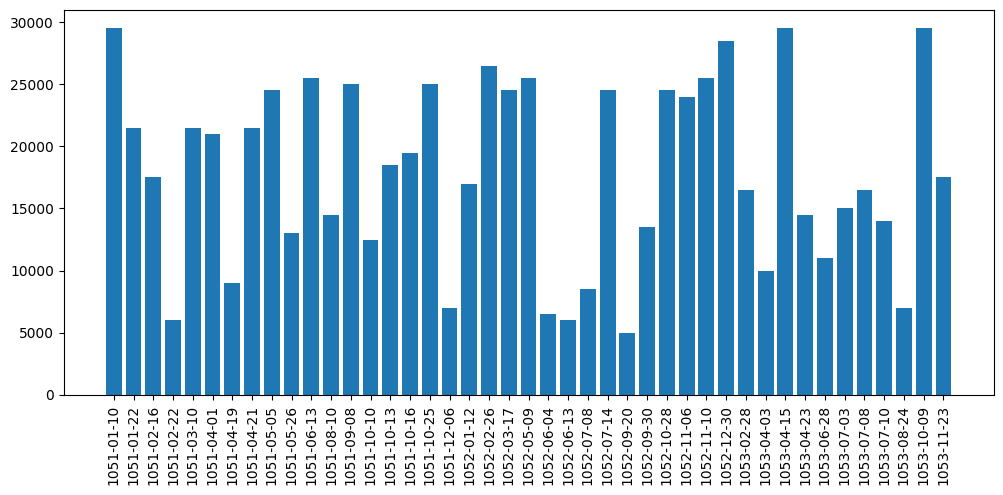

In [231]:
heros = db_heroes['Герой'].unique()
for hero in heros:
    nice_hero = db_heroes[db_heroes['Герой'] == hero]

    if 0 in nice_hero['Выполнено'].values:
        continue

    nice_hero_cases = nice_hero[['Дата поручения', 'Сумма вознаграждения', 'Выполнено']].values
    nice_hero = np.array(sorted(nice_hero_cases, key = lambda x: x[0]))


    plt.figure(figsize = (12, 5))
    plt.bar(nice_hero[:, 0], nice_hero[:, 1])
    plt.xticks(rotation = 90)
    plt.show()

**Ничего подозрительно не видно, после 1053-09-01 у героев было по несколько задач, с которыми они успешно справились**

**Гипотеза: на рынке появились новые заказчики, задачи которых губительны для героев. Чтобы подтвердить или опровергнуть гипотезу соберем историю квестов для каждого нанимателя и посмотрим как менялась награда со временем и в какой момент начали появляться неудачные попытки**

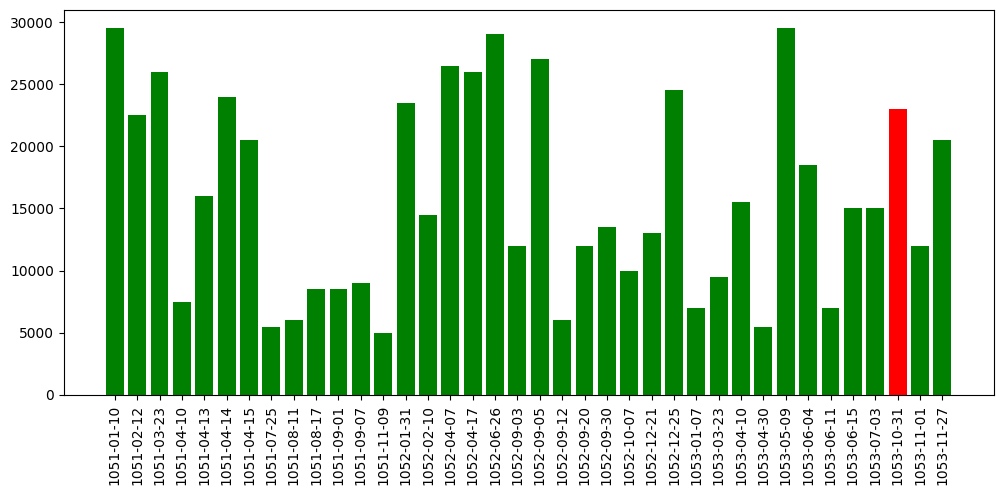

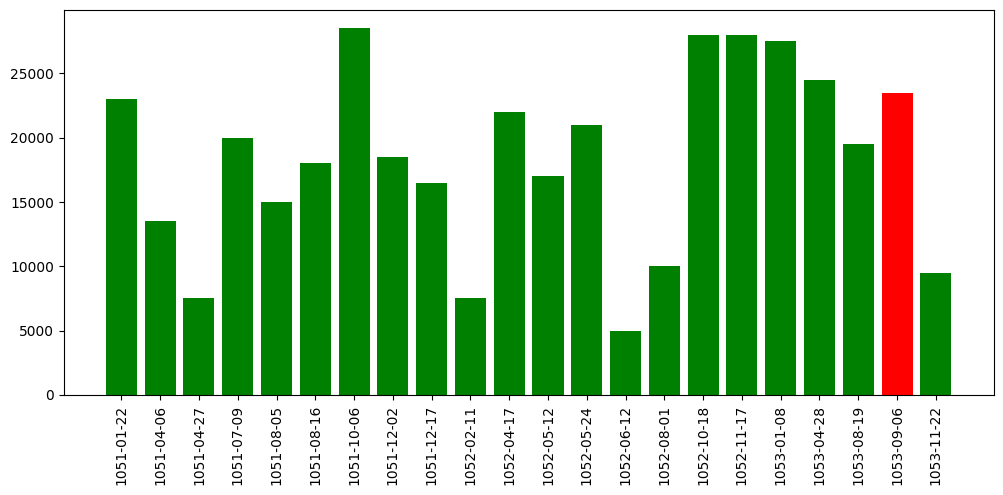

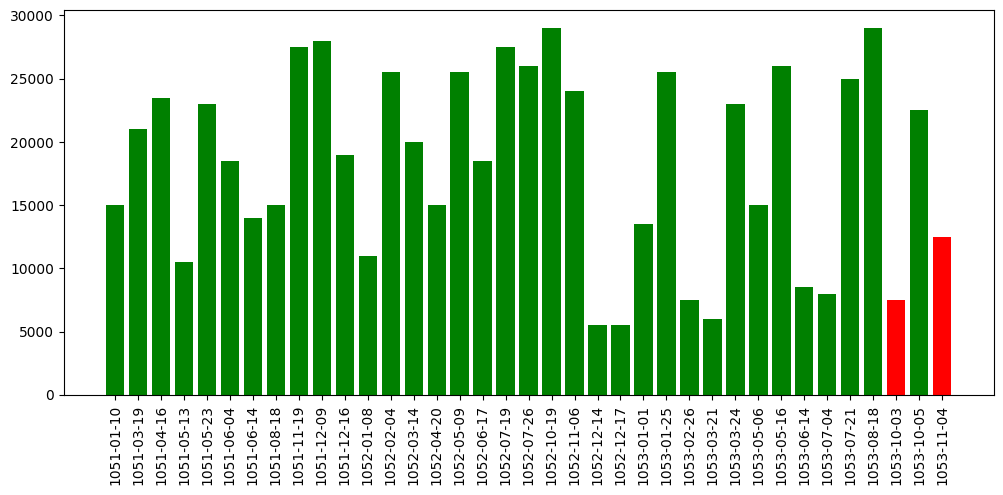

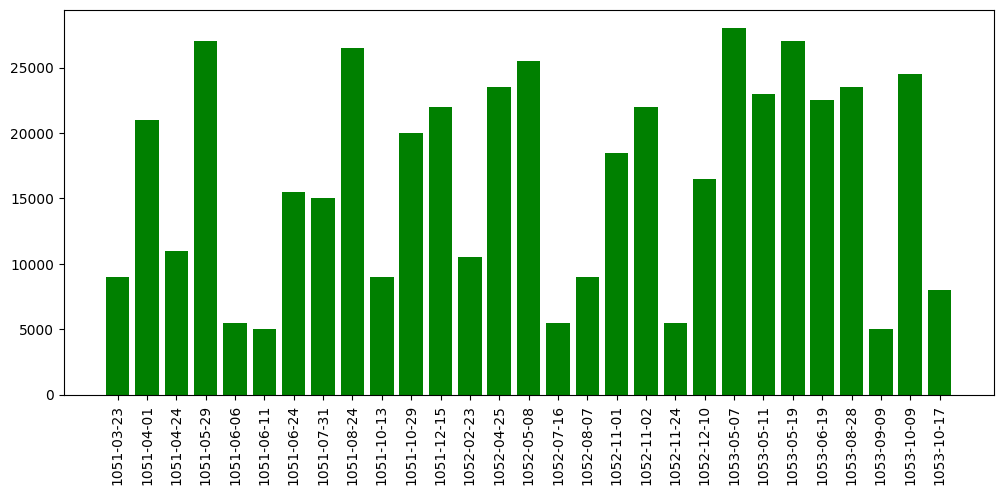

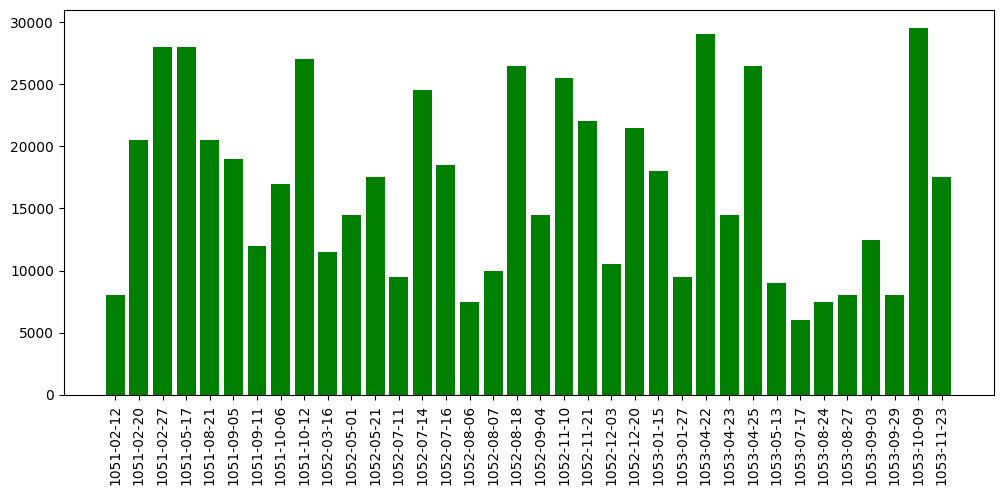

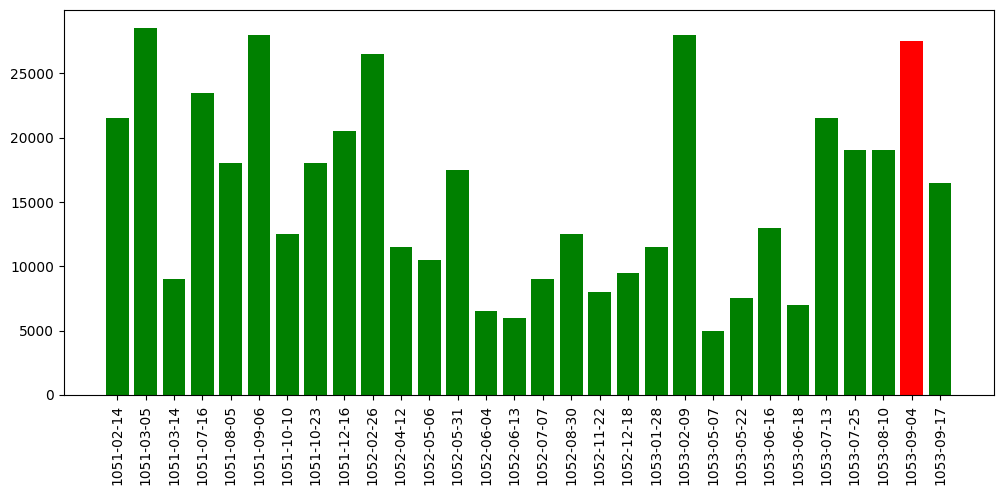

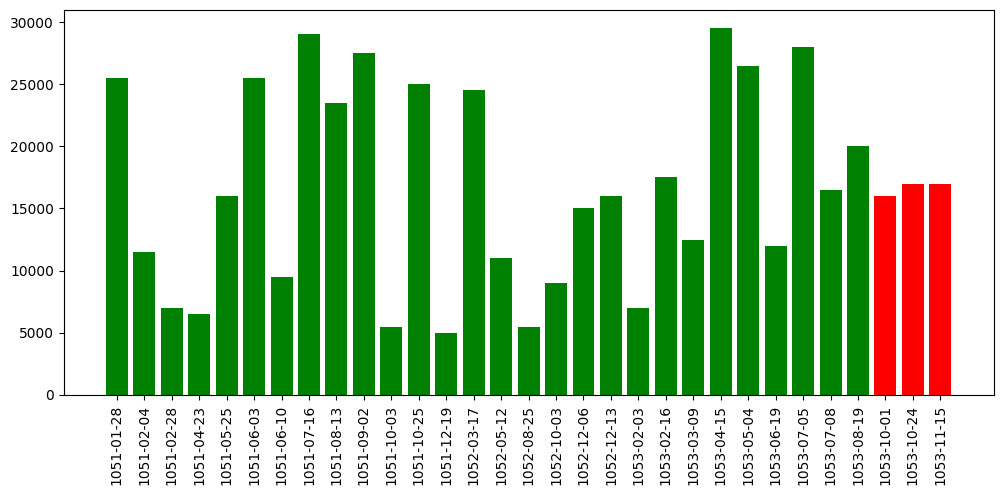

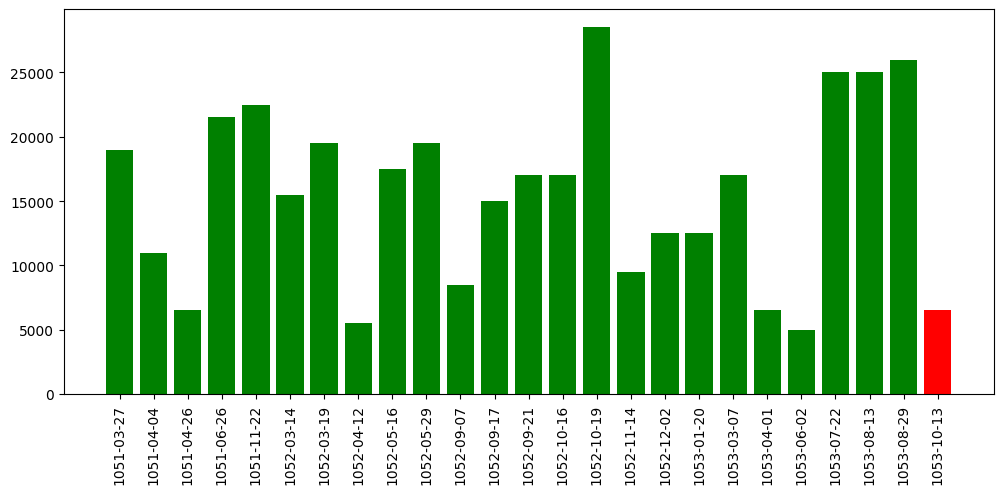

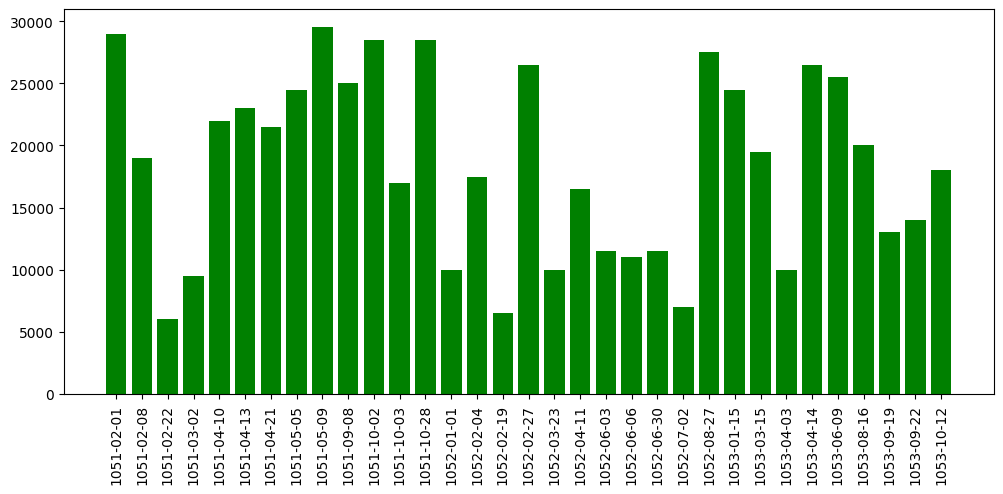

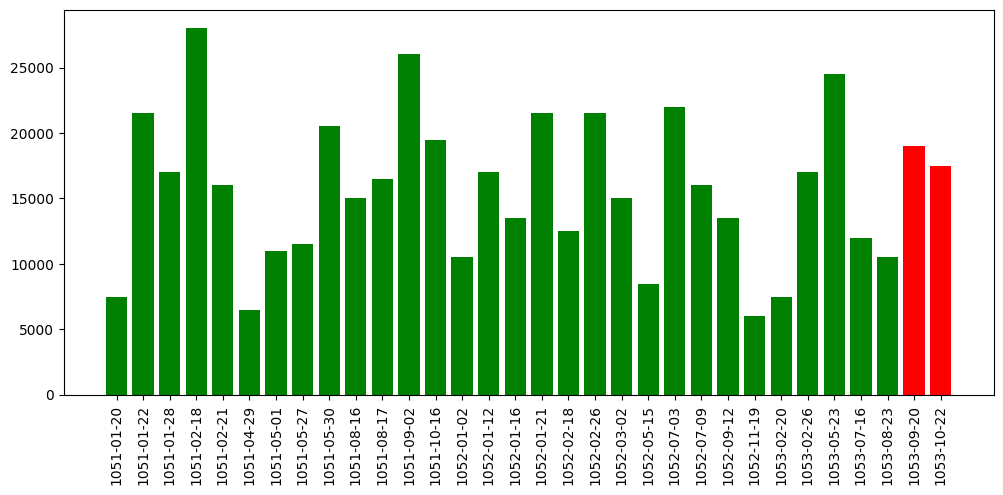

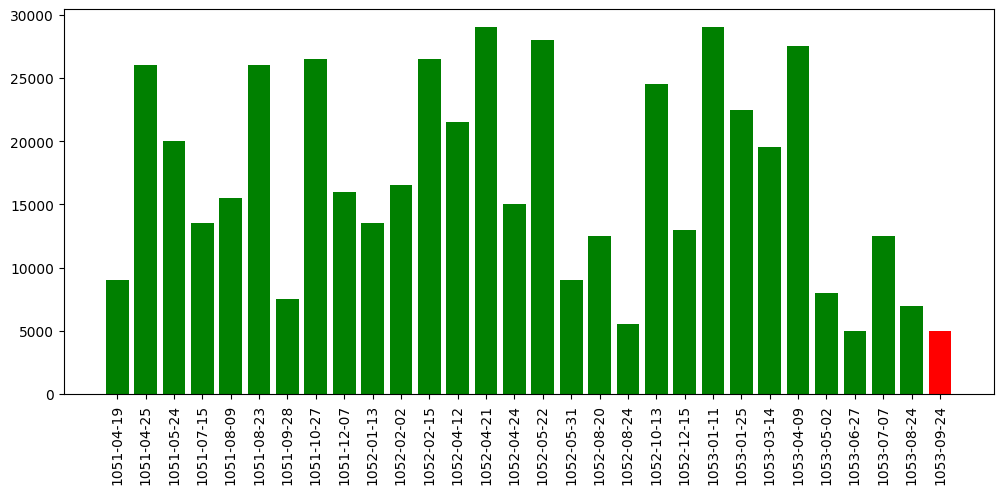

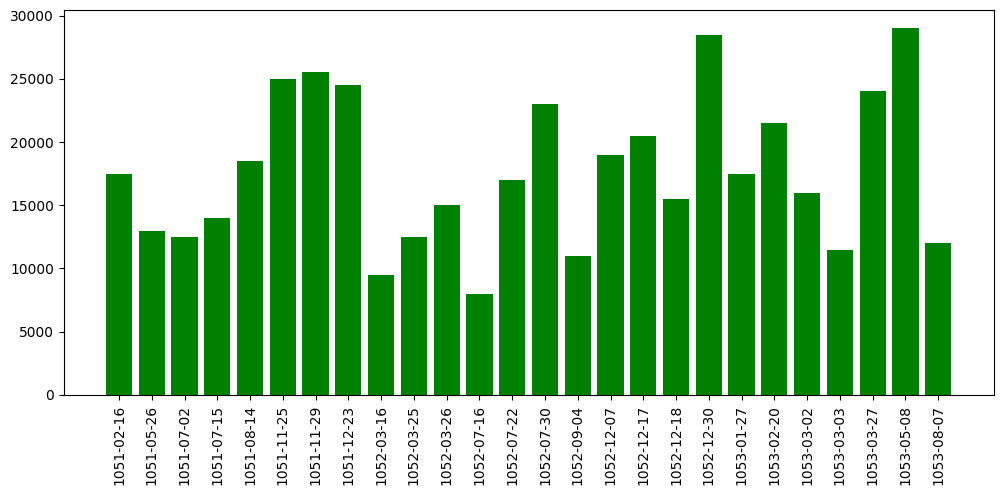

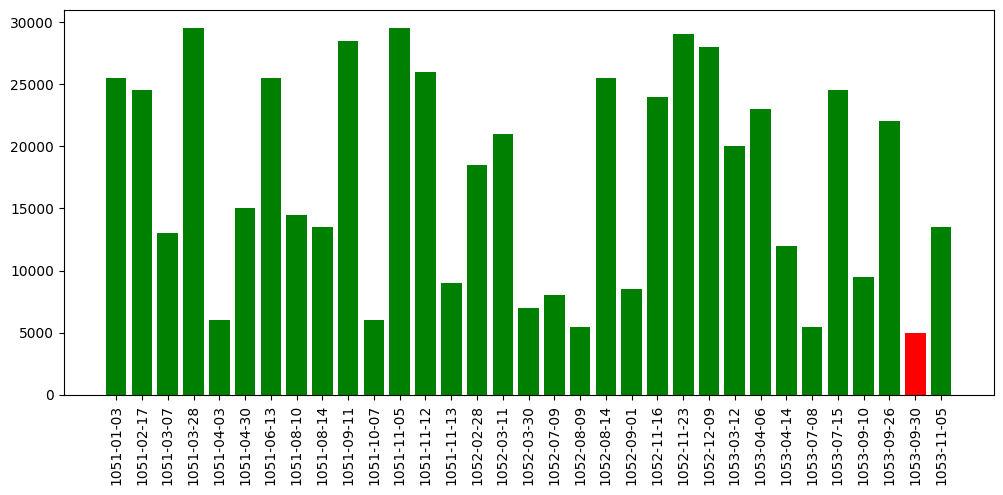

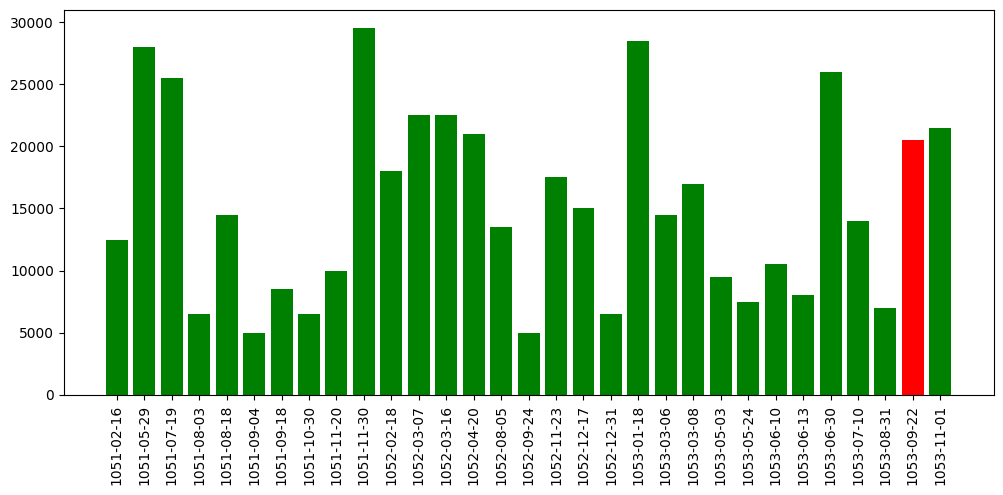

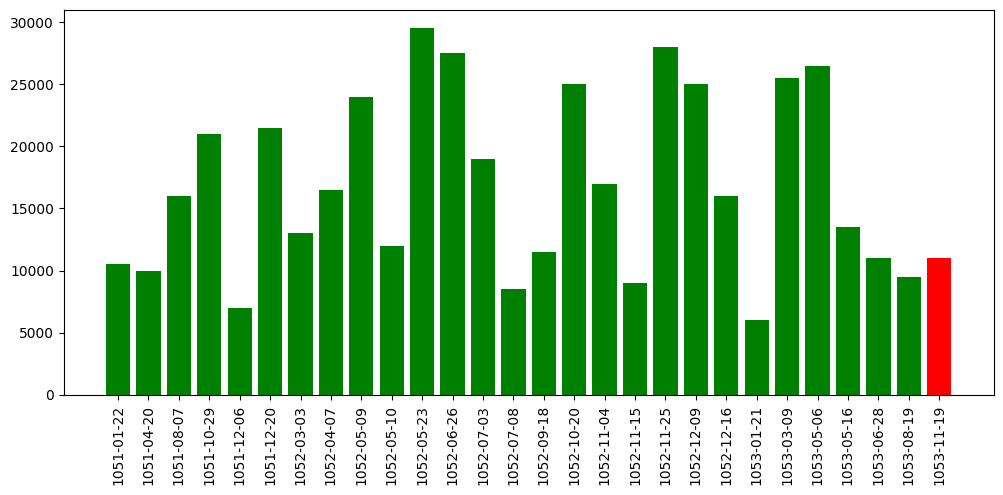

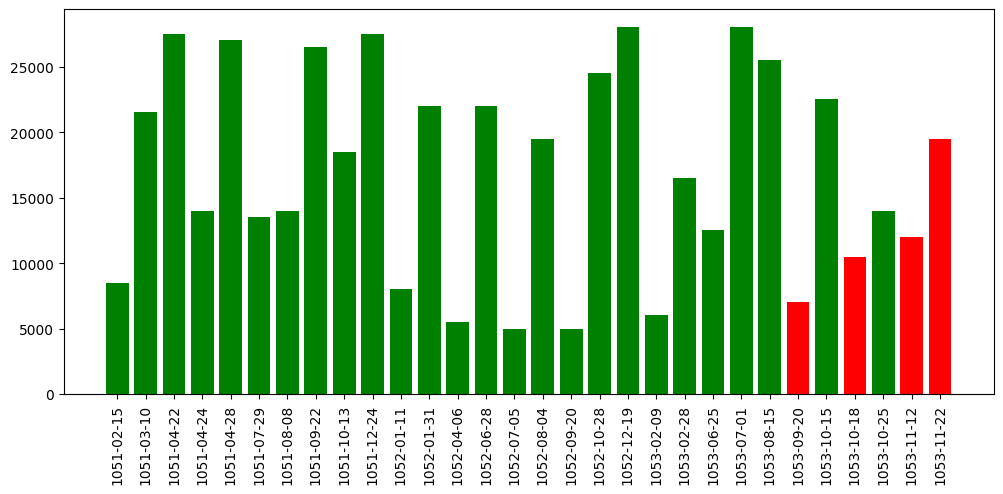

In [232]:
for cust in db_cases['Заказчик'].unique():
    cust_data = sorted(db_cases[db_cases['Заказчик'] == cust][['Дата поручения', 'Сумма вознаграждения', 'Выполнено']].values, key = lambda x: x[0])
    cust_data = np.array(cust_data)

    color = ['red' if elem[2] == 0 else 'green' for elem in cust_data]

    plt.figure(figsize = (12, 5))
    plt.bar(cust_data[:, 0], cust_data[:, 1], color = color)
    plt.xticks(rotation = 90)
    plt.show()
    plt.show()

**Как видно, таких заказчиков нет**

## Аномальные кейсы


In [233]:
# кол-во неудачно выполненных квестов
db_heroes[db_heroes['Выполнено'] == 0]['Выполнено'].size

19

**Рассмотрим все кейсы, которые соответствуют навыкам персонажа, однако оказались неудачными и попытаемся понять есть ли у этого причина или данные представляют собой выбросы**

In [234]:
heros = db_heroes[db_heroes['Выполнено'] == 0]['Герой'].unique()
case_count = 0
problem_heros_tasks = []

for hero in heros:
    wrong_hero = db_heroes[db_heroes['Герой'] == hero]
    num_wrong_cases = db_heroes.query(f'Герой == \'{hero}\' and Выполнено == 0')['Описание'].size

    for i in range(num_wrong_cases):
        hero_case = db_heroes.query(f'Герой == \'{hero}\' and Выполнено == 0')['Описание'].iloc[i]
        hero_case_stat = db_heroes[db_heroes['Герой'] == hero][list(db_items.columns[-6:])].sum().values
        case_stat = db_items[db_items['Описание'] == hero_case][list(db_items.columns[-6:])].values[0]

        flag = 0
        for h, c in zip(hero_case_stat, case_stat):
            if c > 0 and h == 0 or c == -1:
                flag = 1
                break
        if flag:
            continue

        case_count += 1
        problem_heros_tasks.append([hero, hero_case])

        print(f'У героя {hero} для задачи «{hero_case}» показатели:')
        print(' '.join(map(str, hero_case_stat)))
        print('Показатели у задачи:')
        print(' '.join(map(str, case_stat)))


У героя Синеглазый для задачи «По дороге из деревни у меня пропала драгоценность. Нужно вернуть её как можно скорее.» показатели:
0.0 27.67 42.0 324.0 49.5 33.0
Показатели у задачи:
0.0 0.0 0.0 0.0 9.0 6.0
У героя Пастушок для задачи «Недалеко от города у меня пропала драгоценность. Нужно вернуть её как можно скорее.» показатели:
0.0 22.674000000000003 108.0 0.0 135.0 90.0
Показатели у задачи:
0.0 0.0 0.0 0.0 4.5 3.0
У героя Пастушок для задачи «Недалеко от города у меня была украдена драгоценность. Нужно найти её как можно скорее.» показатели:
0.0 22.674000000000003 108.0 0.0 135.0 90.0
Показатели у задачи:
0.0 0.0 0.0 0.0 6.75 4.5
У героя Юлия для задачи «В пещере завёлся дракон. Нужно его убить. Это может потребовать времени и усилий, так как дракон очень опасен.» показатели:
0.0 45.006 66.0 414.0 58.5 39.0
Показатели у задачи:
0.0 1.000142857142857 0.0 18.0 0.0 0.0
У героя Юлия для задачи «В деревне монстры похитили путников. Нужно спасти их.» показатели:
0.0 45.006 66.0 414.0 58.5

In [235]:
case_count

14

In [241]:
# кол-во Описаний без предыдущей истории (встречаются впервые)

len(db_items.query('следопыт == -1'))

3

**Таких кейсов оказалось достаточно много, что требует анализа**

In [242]:
# нужно сделать таблицу с описанием - запись в дневнике
db_diaries

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.000000,рейнджер
1,11000,Мартин,выследить цель,6.000000,следопыт
2,11001,Альфред,разжечь костёр,1.000000,рейнджер
3,11001,Альфред,залечить раны,18.000000,лекарь
4,11002,Мартин,выследить цель,6.000000,следопыт
...,...,...,...,...,...
883,11487,Глюкоза,разжечь костёр,0.666667,боевой маг
884,11488,Альфред,разжечь костёр,2.000000,мечник
885,11493,Бенедикт,разжечь костёр,2.000000,мечник
886,11498,Мартин,разжечь костёр,1.000000,лучник


**Гипотеза: провал связан с отсутствием опыта выполнения действий, для выполнения задания. То есть во всех записях в дневнике героя нет записей, которое нужны для выполнения задания**

In [243]:
heros = np.unique(np.array(problem_heros_tasks)[:, 0])
tasks = np.unique(np.array(problem_heros_tasks)[:, 1])
total = 0
for hero in heros:

    hero_stats = db_heroes[db_heroes['Герой'] == hero]
    hero_wrong_cases = hero_stats[hero_stats['Выполнено'] == 0]
    hero_nice_cases = hero_stats[hero_stats['Выполнено'] == 1]
    print(f'Герой: {hero}')

    for i in range(len(hero_wrong_cases)):
        wrong_case = hero_wrong_cases.iloc[i]['Описание']
        if wrong_case not in tasks:
            continue

        total += 1

        print('Задание: ', wrong_case)
        nice_wrong_case = db_cases.query(f'Описание == \'{wrong_case}\' and Выполнено == 1')['Номер поручения'].values

        skills = []
        for num_case in nice_wrong_case:
            skills += db_diaries[db_diaries['Номер поручения'] == num_case][['Запись в дневнике', 'Затрачено часов']].values.tolist()
        skills = np.array(skills)

        skill_mean_hour = []
        for skill in np.unique(skills[:, 0]):
            skill_mean_hour.append([skill, skills[skills[:, 0] == skill][:, 1].astype(float).mean()])

        skill_mean_hour = np.array(skill_mean_hour)
        print('Требуемые скилы для выполнения задания: ', '; '.join([f'{skill}: {hour}' for skill, hour in skill_mean_hour]))

        all_hero_skills = db_diaries[db_diaries['Герой'] == hero]['Запись в дневнике'].unique()
        print('Имеющиеся скилы: ', ', '.join(all_hero_skills))

        flag = 1
        for skill in skills[:, 0]:
            if skill not in all_hero_skills:
                flag = 0

        if flag:
            print('Вывод:' +  '\033[1m' + 'соответствует' + '\033[0m')
        else:
            print('Вывод:' + '\033[1m' + 'НЕ соответствует' + '\033[0m')

        print()


print(total)



Герой: Агата
Задание:  В городе у меня потерялся рюкзак. Нужно найти его как можно скорее.
Требуемые скилы для выполнения задания:  найти пропажу: 4.5; отыскать заказчика: 3.0
Имеющиеся скилы:  разжечь костёр, выследить цель, найти пропажу, отыскать заказчика
Вывод:соответствует

Задание:  Недалеко от города монстры похитили путников. Нужно спасти их. Осмотрите все возможные укрытия, чтобы найти похищенных.
Требуемые скилы для выполнения задания:  выследить цель: 6.75
Имеющиеся скилы:  разжечь костёр, выследить цель, найти пропажу, отыскать заказчика
Вывод:соответствует

Задание:  По дороге из деревни у меня была украдена драгоценность. Нужно вернуть её как можно скорее.
Требуемые скилы для выполнения задания:  найти пропажу: 4.5; отыскать заказчика: 3.0
Имеющиеся скилы:  разжечь костёр, выследить цель, найти пропажу, отыскать заказчика
Вывод:соответствует

Герой: Альфред
Задание:  В городе у меня потерялся рюкзак. Нужно найти его как можно скорее.
Требуемые скилы для выполнения задани

In [245]:
db_diaries['Запись в дневнике'].unique()

array(['разжечь костёр', 'выследить цель', 'залечить раны',
       'найти пропажу', 'отыскать заказчика'], dtype=object)

In [246]:
db_diaries

,Номер поручения,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Мартин,разжечь костёр,1.000000,рейнджер
1,11000,Мартин,выследить цель,6.000000,следопыт
2,11001,Альфред,разжечь костёр,1.000000,рейнджер
3,11001,Альфред,залечить раны,18.000000,лекарь
4,11002,Мартин,выследить цель,6.000000,следопыт
...,...,...,...,...,...
883,11487,Глюкоза,разжечь костёр,0.666667,боевой маг
884,11488,Альфред,разжечь костёр,2.000000,мечник
885,11493,Бенедикт,разжечь костёр,2.000000,мечник
886,11498,Мартин,разжечь костёр,1.000000,лучник


**Вывод: нет связи между неудачными кейсами и записями в дневнике**

**Промежуточный вывод о выбросах**

**Так как эти 14 записей удовлетворяют способностям героев, то это могут быть только выбросы в контексте данного датасета. Однако данные события начали появляться в один и тот же период времени у разных героев, а не случайно разбросаны по всему временному интервалу, поэтому возможно есть какая-то аргументация почему герои не смогли выполнить задания, но на основании представленных данных такой вывод сделать не удается**

**Гипотеза: на одном из заданий герой сломал руку (или что-нибудь еще) и теперь не может выполнять задания, с которыми он раньше справлялся. Эту гипотезу никак не подтвердить на имеющимся датасете, однако она позволит сделать эти 12 записей не выбросами, а индикаторами того, что данному герою по тем или иным причинам подобные задания выдавать не стоит**

**Справедливость этого может подтвердиться, если есть два похожих задания, для которых верно, что если герой не справился с более ранним, то с таким же более поздним он тоже не справится. Для этого рассмотрим последние задания героев и проведем аналитику**

In [247]:
for hero in db_heroes[db_heroes['Выполнено'] == 0]['Герой'].unique():
    desc_date = db_heroes[db_heroes['Герой'] == hero][db_heroes['Дата поручения'] > '1053-09-01'][['Описание', 'Дата выполнения', 'Выполнено']].values
    desc_date = np.array(sorted(desc_date, key = lambda x: x[1]))
    print(desc_date[:, 0], desc_date[:, 2], sep = '\n')

['По дороге из деревни у меня пропала драгоценность. Нужно вернуть её как можно скорее.'
 'В пещере появвилось огромное каменное чудовище. Нужно убить его.'
 'По дороге из деревни у меня потерялась драгоценность. Нужно вернуть её как можно скорее.'
 'В лесу по дороге от пещеры монстры нападают на людей. Нужно уничтожить их.']
[0 0 0 1]
['В пещере появвилось огромное каменное чудовище. Нужно уничтожить его.'
 'В лесу по дороге от пещеры заметили разбойников. Нужно прогнать их.'
 'Недалеко от города у меня пропала драгоценность. Нужно вернуть её как можно скорее.'
 'Недалеко от города у меня была украдена драгоценность. Нужно найти её как можно скорее.'
 'В пещере появвилось огромное каменное чудовище. Нужно убить его. Это может потребовать времени и усилий, так как огромное каменное чудовище очень опасен.'
 'Недалеко от города у меня была украдена драгоценность. Нужно найти её как можно скорее.'
 'По дороге из деревни монстры похитили путников. Нужно освободить их.']
[0 0 0 0 1 1 1]
['В

**Как видно, данная гипотеза не подтвердилась, так как есть случаи, когда сначала герой не выполнил задание, а потом такое же задание выполнил**

#Создание эмбеддингов для каждого Описания и вычисление расстояния между Описаниями

Суть подхода: при помощи Word2Vec делаем embedding Описания, а далее, по похожести описания у задачи и похожести описания у героя в истории заказов, ранжируем героев

In [33]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-11-14 15:17:29--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  45.1MB/s    in 1.1s    

2024-11-14 15:17:31 (45.1 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [34]:
%pip install navec
import navec

In [35]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
model = Navec.load(path)

In [36]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

data_tok = [tokenizer.tokenize(sentence.lower()) for sentence in db_cases['Описание'].values]

In [37]:
def phrase_func(vectors):
    return np.mean(vectors, axis = 0)

def get_phrase_embedding(phrase):

    zero_vector = np.zeros([model.pq.dim], dtype='float32')

    vectors = []

    for token in tokenizer.tokenize(phrase.lower()):
        if token in model.vocab:
            vectors.append(model.get(token))
    if vectors:
        return phrase_func(vectors)
    else:
        return zero_vector

def rank_candidates(fail, success):
    rank_list = []

    for elem in success:
        rank_list.append([get_simularity(fail[:-1], elem[:-1]), int(elem[-1]), int(fail[-1])])

    return sorted(rank_list, reverse = True)[:10]


In [38]:
data_emb = np.array([get_phrase_embedding(sent) for sent in db_cases['Описание'].values])

In [39]:
db_emb = np.hstack([data_emb, db_cases['Номер поручения'].values[..., np.newaxis]])

In [40]:
embs_success = db_emb[db_cases['Выполнено'] == 1]
embs_fail = db_emb[db_cases['Выполнено'] == 0]

In [41]:
def get_simularity(v1, v2):
    return v1 @ v2 / np.linalg.norm(v1) / np.linalg.norm(v2)

In [42]:
get_simularity(embs_fail[0][:-1], embs_success[100][:-1])

0.7648848203503477

Посмотрим, насколько близко расположены предложения с одинаковым значением, но разными словами

In [43]:
get_simularity(get_phrase_embedding('В пещере появвилось огромное каменное чудовище. Нужно уничтожить его.'), \
               get_phrase_embedding('В пещере завёлся дракон. Нужно его убить.'))

0.77480173

In [44]:
rank_candidates(embs_fail[6], embs_success)

[[0.9810559893723451, 11092, 11234],
 [0.9793000833421233, 11194, 11234],
 [0.9784829521644185, 11236, 11234],
 [0.9624587198702558, 11014, 11234],
 [0.956006963308168, 11350, 11234],
 [0.956006963308168, 11257, 11234],
 [0.956006963308168, 11021, 11234],
 [0.9534757454948815, 11238, 11234],
 [0.9534362732971121, 11490, 11234],
 [0.9534362732971121, 11466, 11234]]

# Создание карточек с полями: герой - описание - эмбеддинг описания - ключевые слова

In [249]:
db_heroes_cases = db_cases.merge(db_marks, 'inner', 'Номер поручения')[['Выполнено', 'Герой', 'Описание']]
db_heroes_cases = db_heroes_cases.query('Выполнено == 1').reset_index(drop = True)[['Герой', 'Описание']]
db_heroes_cases['embedding'] = db_heroes_cases['Описание'].agg(get_phrase_embedding)
db_heroes_cases.head()

,Герой,Описание,embedding
0,Мартин,В лесу по дороге от пещеры звери нападают на л...,"[-0.05693717, -0.18533728, -0.23857927, 0.2404..."
1,Альфред,В лесу по дороге от пещеры были замечены разбо...,"[-0.01111177, -0.17058222, -0.071999446, 0.299..."
2,Мартин,По дороге из деревни монстры похитили путников...,"[-0.06322983, -0.10679455, -0.16933969, 0.1930..."
3,Бендер,Недалеко от города видели монстров. Нужно побе...,"[-0.0357237, -0.12779894, -0.094497696, 0.1673..."
4,Юлия,В деревне у меня пропала сумка с документами. ...,"[0.013275759, -0.32078427, -0.120718405, 0.094..."


# Получение и анализ результатов

**Кейсы, которые соответствуют навыкам героя, но оказались неудачными, рассмотрим отдельно**

In [251]:
# Для сравнения, список героев и невыполненых кейсов

wrong_cases_large = db_cases.merge(db_marks, 'inner', 'Номер поручения')
wrong_cases_large = wrong_cases_large[wrong_cases_large['Выполнено'] == 0]
wrong_cases_large.head()

,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,Описание,Номер поручения,Герой,Оценка за качество,Оценка по срокам,Оценка за вежливость
56,Мария,1053-09-06,0,0000-00-00,0.0,23500,По дороге из деревни у меня пропала драгоценно...,11056,Синеглазый,4,4,4
134,Иван,1053-09-04,0,0000-00-00,0.0,27500,В пещере появвилось огромное каменное чудовище...,11134,Пастушок,5,4,4
143,Егор,1053-10-18,0,0000-00-00,0.0,10500,В пещере завёлся дракон. Нужно его убить. Это ...,11143,Юлия,5,4,5
161,Эмилио,1053-10-03,0,0000-00-00,0.0,7500,В городе у меня потерялся рюкзак. Нужно найти ...,11161,Агата,4,4,4
218,Олег,1053-10-01,0,0000-00-00,0.0,16000,Недалеко от города монстры похитили путников. ...,11218,Агата,4,3,2


In [193]:
wrong_cases = db_cases[db_cases['Выполнено'] == 0]
wrong_cases.head()

,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,Описание,Номер поручения
56,Мария,1053-09-06,0,0000-00-00,0.0,23500,По дороге из деревни у меня пропала драгоценно...,11056
134,Иван,1053-09-04,0,0000-00-00,0.0,27500,В пещере появвилось огромное каменное чудовище...,11134
143,Егор,1053-10-18,0,0000-00-00,0.0,10500,В пещере завёлся дракон. Нужно его убить. Это ...,11143
161,Эмилио,1053-10-03,0,0000-00-00,0.0,7500,В городе у меня потерялся рюкзак. Нужно найти ...,11161
218,Олег,1053-10-01,0,0000-00-00,0.0,16000,Недалеко от города монстры похитили путников. ...,11218


In [260]:
def phrase_func(vectors):
    '''
        Возвращаем среднее от всех слов в эмбеддинге
    '''

    return np.mean(vectors, axis = 0)

def get_phrase_embedding(phrase):
    '''
        Создание эмбеддинга Описания
    '''

    zero_vector = np.zeros([model.pq.dim], dtype='float32')

    vectors = []

    for token in tokenizer.tokenize(phrase.lower()):
        if token in model.vocab:
            vectors.append(model.get(token))
    if vectors:
        return phrase_func(vectors)
    else:
        return zero_vector

def rank_candidates(fail, success):
    '''
        Ранжирование кандидатов по эмбеддингам Описания
    '''

    rank_list = []

    for elem in success.values:
        hero = elem[0] # имя героя
        descr = elem[1] # удачный квест
        emb = elem[2] # эмбеддинг квеста
        rank_list.append([get_simularity(fail, emb), hero, descr])

    return sorted(rank_list, key = lambda x: x[0], reverse = True)[:10]

def get_unique_candidates(candidates):
    '''
        Возвращает уникальных кандидатов
    '''
    uniq_names = set()
    res = []
    for cand in candidates:
        if cand[0] not in uniq_names:
            uniq_names.add(cand[0])
            res.append(cand)
    return np.array(res)


def get_top_heroes(wrong_case, success_cases):
    '''
        Вывод финального списка кандидатов на выполенение задания
    '''

    wrong_descr = wrong_case['Описание'] # невыполненное описание
    wrong_emb = get_phrase_embedding(wrong_descr) # эмбеддинг невыполненного описания
    top_candidates = np.array(rank_candidates(wrong_emb, success_cases))[:, 1:] # имя и описание для топовых кандидатов

    skills_name = db_heroes.columns[-5:] # название всех скиллов
    item_skill = db_items.query(f'Описание == \'{wrong_descr}\'')[skills_name].mean() #среднее по всем скиллам, которые нужны для выполнения данного задания
    del_candidates = [] # список индексов неподходящих кандидатов

    for i, candidate_descr in enumerate(top_candidates):
        candidate = candidate_descr[0]
        descr = candidate_descr[1]

        # отсеиваем не подходящих по способностям героев
        hero_skill = db_heroes.query(f'Герой == \'{candidate}\' and Описание == \'{descr}\'')[skills_name].mean()
        for skill1, skill2 in zip(hero_skill, item_skill):
            if skill1 <= 0 and skill2 > 0:
                del_candidates.append(i)

    top_candidates = np.delete(top_candidates, del_candidates, axis = 0)

    # ранжируем героев по возрастанию времени выполнения задачи и награды за задание
    final_candidates = []
    for candidate, descr in top_candidates:
        time, money = db_heroes.query(f'Герой == \'{candidate}\' and Описание == \'{descr}\'')[['Затрачено дней', 'Сумма вознаграждения']].mean().values
        final_candidates.append([candidate, int(time), int(money)])

    final_candidates.sort(key = lambda x: (x[1], x[2]))

    return get_unique_candidates(final_candidates)

In [261]:
i = 0
get_top_heroes(wrong_cases.iloc[i], db_heroes_cases), wrong_cases_large.query(f'Описание == \'{wrong_cases.iloc[i].values[-2]}\' and Выполнено == 0')['Герой'].values

(array([['Мартин', '1', '13000'],
        ['Пастушок', '1', '26000'],
        ['Агата', '3', '15000'],
        ['Бендер', '3', '20500'],
        ['Глюкоза', '4', '7000'],
        ['Фредерик', '5', '7500'],
        ['Бенедикт', '6', '11000']], dtype='<U21'),
 array(['Синеглазый'], dtype=object))

In [262]:
counter = 0
total = 0
i = 0

while True:
    try:
        for elem in wrong_cases_large.query(f'Описание == \'{wrong_cases.iloc[i].values[-2]}\' and Выполнено == 0')['Герой'].values:
            if elem not in get_top_heroes(wrong_cases.iloc[i], db_heroes_cases):
                counter += 1
            total += 1
        i += 1
    except:
        break

print(counter / total)

0.47619047619047616


**Как видно, в 47.6% случаев герой, проваливший задание, не попадает в список рейтинга, если учитывать, что только 2 из 19 имеют предысторию и не являются выбросами, а еще 3 не имеют предыстории, что составляет примерно 25%, то результат можно считать хорошим, так как он умеет верно ранжировать и выбросы**